## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "outer")
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
numofmice = len(combined_data["Mouse ID"])
numofuniquemice = combined_data["Mouse ID"].nunique()
numofmice, numofuniquemice

(1893, 249)

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

In [6]:
# Checking the number of mice in the clean DataFrame.
numofmice = len(cleaned_data["Mouse ID"])
numofuniquemice = cleaned_data["Mouse ID"].nunique()
numofmice, numofuniquemice

(1888, 249)

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summarystatistics = cleaned_data.groupby("Drug Regimen").agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'sem']})
summarystatistics = pd.DataFrame(summarystatistics)
# summarystatistics.columns = [""]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summarystatistics

Tumor Volume (mm3)                                
                           mean     median        var       sem
Drug Regimen                                                   
Capomulin             40.675741  41.557809  24.947764  0.329346
Ceftamin              52.591172  51.776157  39.290177  0.469821
Infubinol             52.884795  51.820584  43.128684  0.492236
Ketapril              55.235638  53.698743  68.553577  0.603860
Naftisol              54.331565  52.509285  66.173479  0.596466
Placebo               54.033581  52.288934  61.168083  0.581331
Propriva              52.393463  50.909965  43.138803  0.525862
Ramicane              40.216745  40.673236  23.486704  0.320955
Stelasyn              54.233149  52.431737  59.450562  0.573111
Zoniferol             53.236507  51.818479  48.533355  0.516398

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

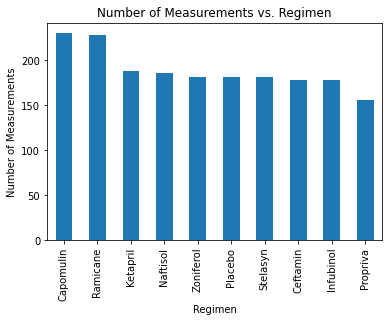

In [77]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
cleaned_data['Drug Regimen'].value_counts().plot(kind="bar")
#fix format and labels
plt.xlabel("Regimen")
plt.ylabel("Number of Measurements")
plt.title("Number of Measurements vs. Regimen")
plt.show()

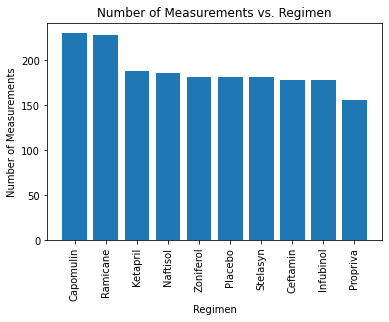

In [78]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x = cleaned_data['Drug Regimen'].value_counts()
lables = list(x.index)
plt.bar(lables, x)
plt.xticks(rotation = 90)
plt.xlabel("Regimen")
plt.ylabel("Number of Measurements")
plt.title("Number of Measurements vs. Regimen")
plt.show()
plt.show()


Text(0.5, 1.0, 'Male vs Female Rats')

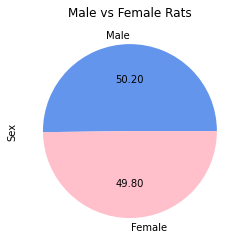

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genderplot = cleaned_data.drop_duplicates(subset=['Mouse ID', 'Sex'])
genderplot['Sex'].value_counts().plot(kind="pie", autopct='%.2f', colors = ['cornflowerblue', 'pink'])
plt.title("Male vs Female Rats")
plt.show()

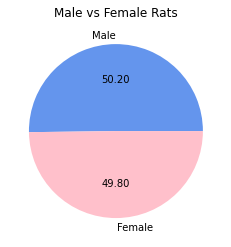

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x = genderplot['Sex'].value_counts()
plt.pie(x, labels = ["Male", "Female"], autopct='%.2f', colors = ['cornflowerblue', 'pink'])
plt.title("Male vs Female Rats")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse)

cleaned_data2 = cleaned_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]
cleaned_data2 = cleaned_data2.set_index("Mouse ID")

maxmouse = cleaned_data2.groupby(["Mouse ID"]).agg({"Timepoint": ["max"]})
maxmouse = pd.DataFrame(maxmouse)
maxmouse.column = ["Timepoint Max"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
finalvolume = maxmouse.join(cleaned_data2, how="inner", on = "Mouse ID")
finalvolume = pd.DataFrame(finalvolume)
finalvolume.columns = ['Timepoint Max', 'Timepoint', 'Tumor Volume',  "Drug Regimen"]
finalvolume2 = finalvolume.loc[finalvolume['Timepoint Max'] == finalvolume['Timepoint']]
Dataframefinalvolume = pd.DataFrame(finalvolume2)
Dataframefinalvolume =Dataframefinalvolume.drop(['Timepoint Max', 'Timepoint'], axis=1)
#creat a data frame with all the max


<ipython-input-13-b5dd39465fa3>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  maxmouse.column = ["Timepoint Max"]
C:\Users\ckkoc\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [49]:
# Put treatments into a list for for loop (and later for plot labels)



# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    
outlierslist = []
Regimens = list(Dataframefinalvolume["Drug Regimen"].unique())
    
for x in Regimens:
    currentreg = Dataframefinalvolume.loc[Dataframefinalvolume["Drug Regimen"] == x]
    quartiles = currentreg["Tumor Volume"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = currentreg.loc[(currentreg["Tumor Volume"] > upper_bound) | (currentreg["Tumor Volume"] < lower_bound)]
    if (outliers.empty):
        continue
    else:
        outlierslist.append(outliers)
print(outlierslist)

[          Tumor Volume Drug Regimen
Mouse ID                           
c326         36.321346    Infubinol]


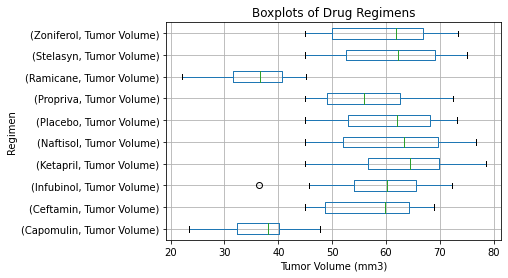

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplottable = Dataframefinalvolume.groupby(["Drug Regimen"])
boxplottable.boxplot(subplots=False, vert = False)
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Regimen")
plt.title("Boxplots of Drug Regimens")
plt.show()

## Line and Scatter Plots

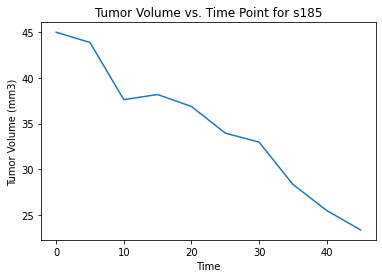

In [45]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulinmouse = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"]
Capomulinmousetable185 = Capomulinmouse.loc[Capomulinmouse['Mouse ID'] == "s185"]
plt.plot(Capomulinmousetable185["Timepoint"], Capomulinmousetable185["Tumor Volume (mm3)"])
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Time Point for s185")
plt.show()

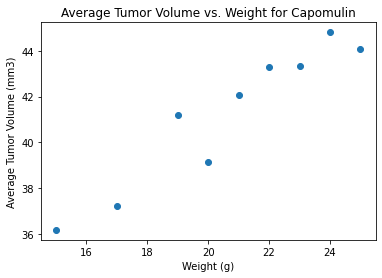

In [59]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulinmousescatter = pd.DataFrame(Capomulinmouse.groupby("Weight (g)").mean())
plt.scatter(Capomulinmousescatter.index, Capomulinmousescatter["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Weight for Capomulin")
plt.show()

## Correlation and Regression

In [61]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corcoefficient = st.pearsonr(Capomulinmousescatter.index, Capomulinmousescatter["Tumor Volume (mm3)"])

print(corcoefficient[0])

0.9505243961855269

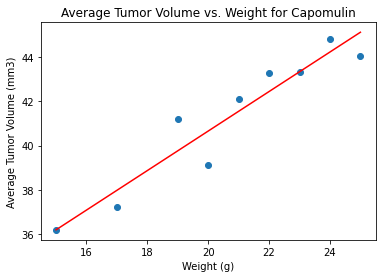

In [69]:
(slope, intercept, rvaluem, pvalue, stderr) = st.linregress(Capomulinmousescatter.index, Capomulinmousescatter["Tumor Volume (mm3)"])
regress_values = (Capomulinmousescatter.index * slope) + intercept
plt.plot(Capomulinmousescatter.index, regress_values, color = "r")
plt.scatter(Capomulinmousescatter.index, Capomulinmousescatter["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Weight for Capomulin")
plt.show()